# Benchmarking Results

In [1]:
import numpy as np
import pandas as pd
import notebook_helper_functions.plot_functions as plot_funcs

TODO
1. Pick notebook wide matplotlib color scheme
2. Build better way to set font sizes globally
3. Check and make sure rate calculation are correct (dynamically based on batch or replicate size)
4. Decide how to plot variability - SEM? STDEV? Use max were appropriate (i.e. max memory footprint)?
5. Maybe work on SQL load?
6. Finish final optimized benchmark with plots and analysis
7. Add notes/discussion
8. Save plots for slides
9. Include evaluation/samples of summaries somehow
10. Quantify accumulated speed up at each step.

## 1. Baseline execute time

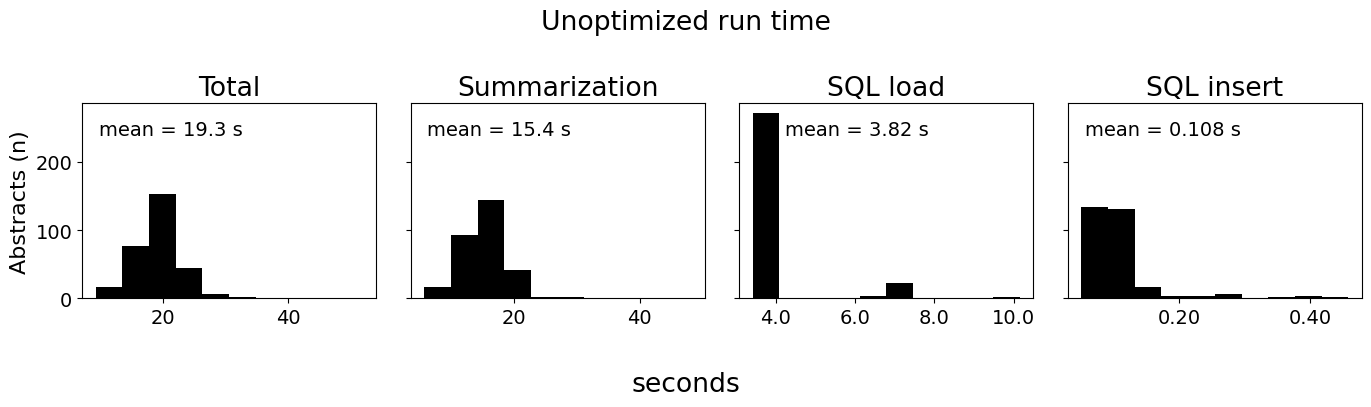

In [2]:
data = plot_funcs.baseline_execution_plot('../benchmarks/baseline_execute_time/results.csv')

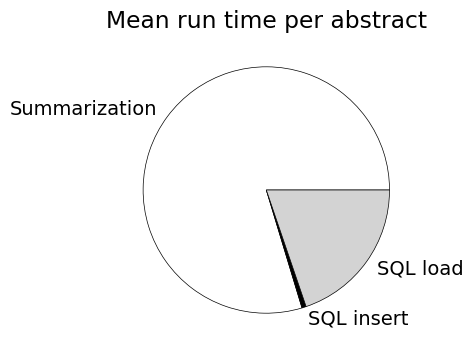

In [3]:
plot_funcs.baseline_execution_pie('../benchmarks/baseline_execute_time/results.csv')

**Conclusion**: Not surprisingly, the most time is spent in inference - waiting for the model to summarize the abstract. Focus optimization effort there.

## 2. Huggingface device map

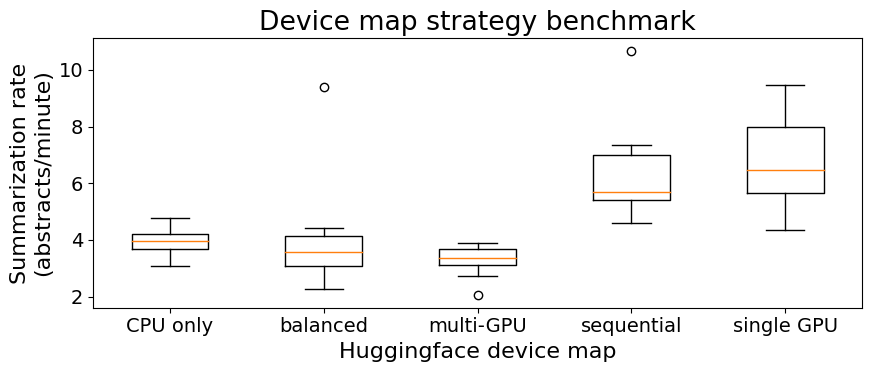

  device map strategy  mean summarization rate (abstracts/min.)
0            CPU only                                      3.93
1            balanced                                      4.03
2           multi-GPU                                      3.28
3          sequential                                      6.38
4          single GPU                                      6.65


In [4]:
data = plot_funcs.device_map_plot('../benchmarks/huggingface_device_map/results.csv')

**Conclusion**: Single GPU or sequential is the best device map. Focus on single GPU moving forward so that data parallel inference can be run on multiple GPUs.

## 3. Parallel summarization

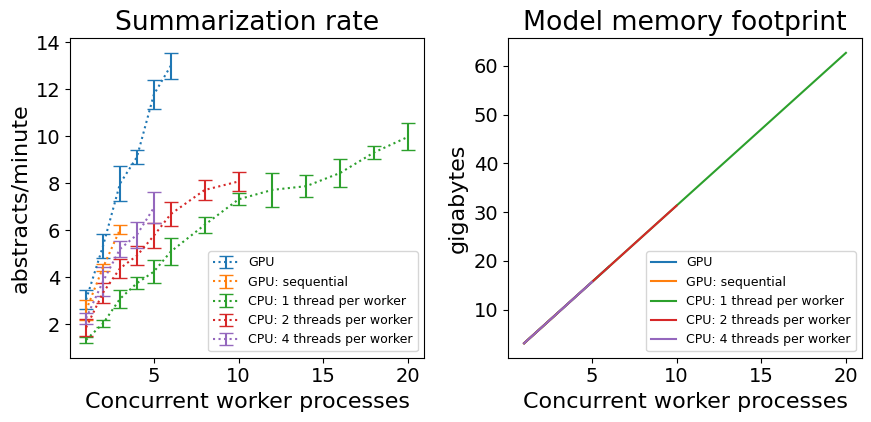

Summarization rate (abstracts/minute)
workers                      1     2     3     4      5      6     8     10  \
device                                                                        
CPU: 1 thread per worker   1.33  2.03  3.08  3.74   4.23   5.09  6.23  7.31   
CPU: 2 threads per worker  1.86  3.34  4.38  4.91   5.77   6.69  7.71  8.07   
CPU: 4 threads per worker  2.25  3.82  5.20  5.80   6.96    NaN   NaN   NaN   
GPU                        3.04  5.33  7.98  9.11  11.78  13.00   NaN   NaN   
GPU: sequential            2.59  4.41  6.03   NaN    NaN    NaN   NaN   NaN   

workers                      12    14    16    18    20  
device                                                   
CPU: 1 thread per worker   7.72  7.87  8.44  9.31  9.97  
CPU: 2 threads per worker   NaN   NaN   NaN   NaN   NaN  
CPU: 4 threads per worker   NaN   NaN   NaN   NaN   NaN  
GPU                         NaN   NaN   NaN   NaN   NaN  
GPU: sequential             NaN   NaN   NaN   NaN   NaN  

M

In [5]:
data = plot_funcs.parallel_summarization_plot(    
    data_file='../benchmarks/parallel_summarization/results.csv',
    plot_vars = ['summarization rate (abstracts/min.)', 'model memory footprint (GB)'],
    plot_devices = ['GPU', 'GPU: sequential', 'CPU: 1 thread per worker', 'CPU: 2 threads per worker', 'CPU: 4 threads per worker'],
    legend_entries = ['GPU', 'GPU: sequential', 'CPU: 1 thread per worker', 'CPU: 2 threads per worker', 'CPU: 4 threads per worker'],
    unique_condition_columns=[
        'device',
        'workers'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    str_columns=['device'], 
    int_columns=[
        'replicate',
        'workers',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan
)

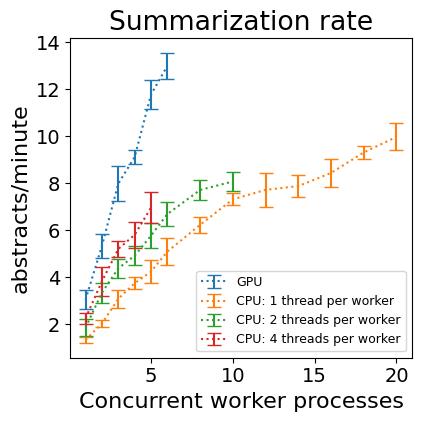

Summarization rate (abstracts/minute)
workers                      1     2     3     4      5      6     8     10  \
device                                                                        
CPU: 1 thread per worker   1.33  2.03  3.08  3.74   4.23   5.09  6.23  7.31   
CPU: 2 threads per worker  1.86  3.34  4.38  4.91   5.77   6.69  7.71  8.07   
CPU: 4 threads per worker  2.25  3.82  5.20  5.80   6.96    NaN   NaN   NaN   
GPU                        3.04  5.33  7.98  9.11  11.78  13.00   NaN   NaN   

workers                      12    14    16    18    20  
device                                                   
CPU: 1 thread per worker   7.72  7.87  8.44  9.31  9.97  
CPU: 2 threads per worker   NaN   NaN   NaN   NaN   NaN  
CPU: 4 threads per worker   NaN   NaN   NaN   NaN   NaN  
GPU                         NaN   NaN   NaN   NaN   NaN  



In [6]:
data = plot_funcs.parallel_summarization_plot(    
    data_file='../benchmarks/parallel_summarization/results.csv',
    plot_vars = ['summarization rate (abstracts/min.)'],
    plot_devices = ['GPU', 'CPU: 1 thread per worker', 'CPU: 2 threads per worker', 'CPU: 4 threads per worker'],
    legend_entries = ['GPU', 'CPU: 1 thread per worker', 'CPU: 2 threads per worker', 'CPU: 4 threads per worker'],
    unique_condition_columns=[
        'device',
        'workers'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    str_columns=['device'], 
    int_columns=[
        'replicate',
        'workers',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan
)

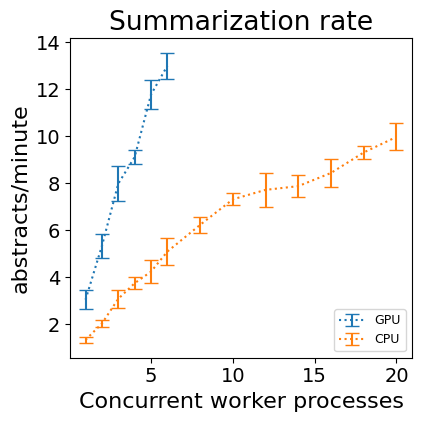

Summarization rate (abstracts/minute)
workers                     1     2     3     4      5      6     8     10  \
device                                                                       
CPU: 1 thread per worker  1.33  2.03  3.08  3.74   4.23   5.09  6.23  7.31   
GPU                       3.04  5.33  7.98  9.11  11.78  13.00   NaN   NaN   

workers                     12    14    16    18    20  
device                                                  
CPU: 1 thread per worker  7.72  7.87  8.44  9.31  9.97  
GPU                        NaN   NaN   NaN   NaN   NaN  



In [7]:
data = plot_funcs.parallel_summarization_plot(    
    data_file='../benchmarks/parallel_summarization/results.csv',
    plot_vars = ['summarization rate (abstracts/min.)'],
    plot_devices = ['GPU', 'CPU: 1 thread per worker'],
    legend_entries = ['GPU', 'CPU'],
    unique_condition_columns=[
        'device',
        'workers'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    str_columns=['device'], 
    int_columns=[
        'replicate',
        'workers',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan
)

**Conclusion** Not surprisingly, GPU still beats CPU, even though more parallel jobs can run on CPU due to more available system memory.

## 4. Model quantization

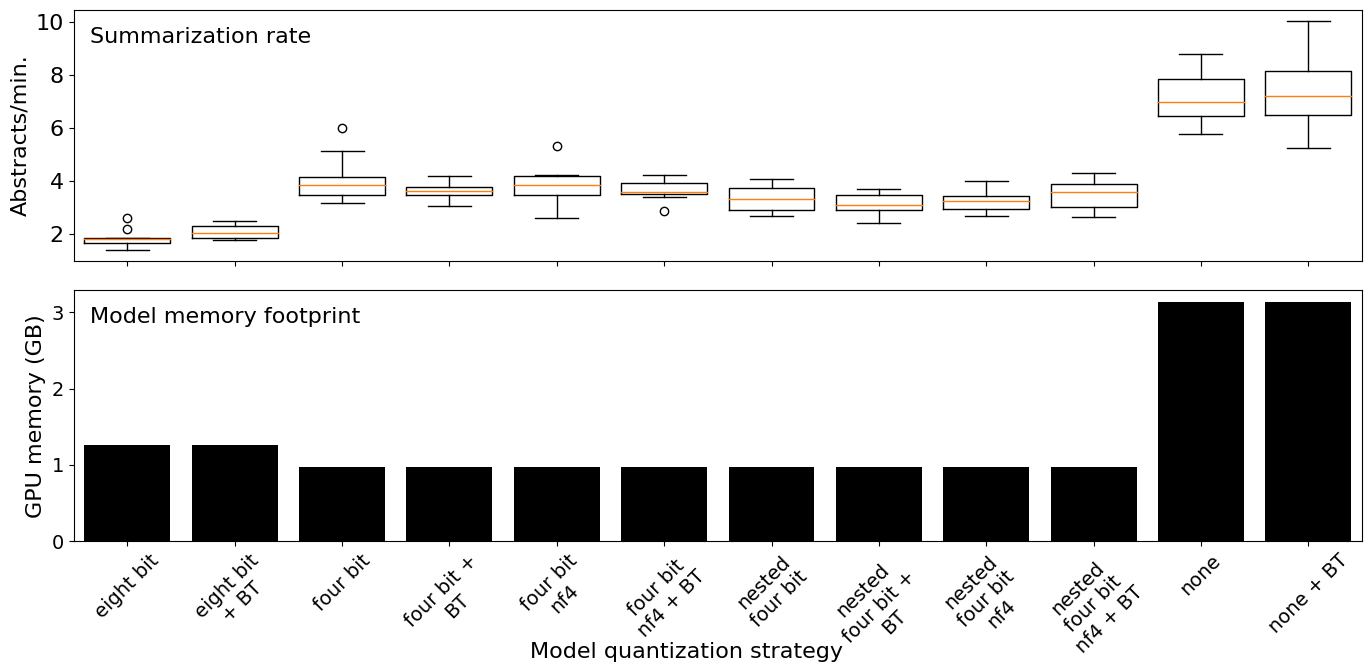

                          summarization rate (abstracts/min.)  \
quantization strategy                                           
eight bit                                                1.85   
eight bit + BT                                           2.08   
four bit                                                 4.07   
four bit + BT                                            3.62   
four bit nf4                                             3.82   
four bit nf4 + BT                                        3.68   
nested four bit                                          3.33   
nested four bit + BT                                     3.12   
nested four bit nf4                                      3.24   
nested four bit nf4 + BT                                 3.50   
none                                                     7.18   
none + BT                                                7.33   

                          model GPU memory footprint (GB)  \
quantization strategy       

In [8]:
data = plot_funcs.model_quantization_plot('../benchmarks/model_quantization/results.csv')

**Conclusion**: Quantization can decrease the model's memory footprint by about 3-fold, but at a significant cost to inference speed.

## 5. Batched summarization

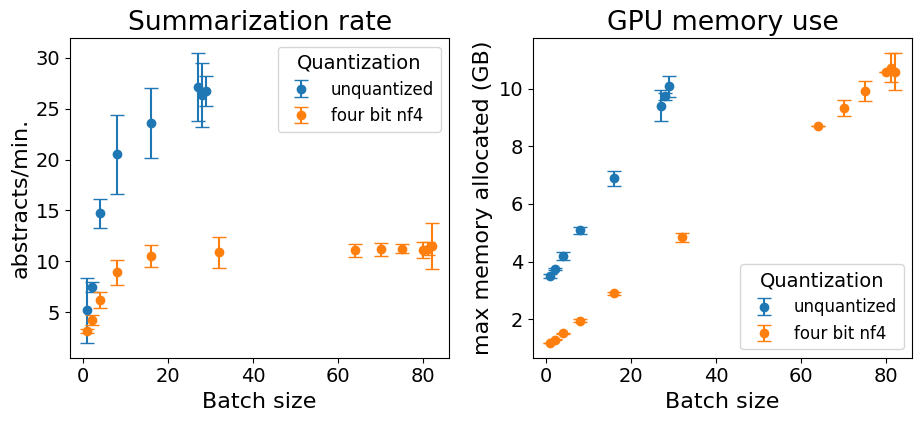

             max memory allocated (GB)        \
quantization              four bit nf4  none   
batch size                                     
1                                  1.2   3.5   
2                                  1.3   3.7   
4                                  1.5   4.2   
8                                  2.0   5.1   
16                                 2.9   6.9   
27                                 nan   9.4   
28                                 nan   9.7   
29                                 nan  10.1   
32                                 4.8   nan   
64                                 8.7   nan   
70                                 9.3   nan   
75                                 9.9   nan   
80                                10.6   nan   
81                                10.6   nan   
82                                10.7   nan   

             summarization rate (abstracts/min.)        
quantization                        four bit nf4  none  
batch size           

In [9]:
data = plot_funcs.batched_summarization_plot(
    datafile='../benchmarks/batched_summarization/results.csv',
    unique_condition_columns=[
        'batch size',
        'quantization'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    quantization_method='four bit nf4',
    str_columns=['quantization'], 
    int_columns=[
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan
)

**Conclusion**: Quantization allows for larger batch sizes due to the smaller memory footprint of the model, but the resulting speedup is not enough to make up for the lower summarization rate quantization also causes. Don't bother quantizing the model.

## 5. Parallel batched summarization

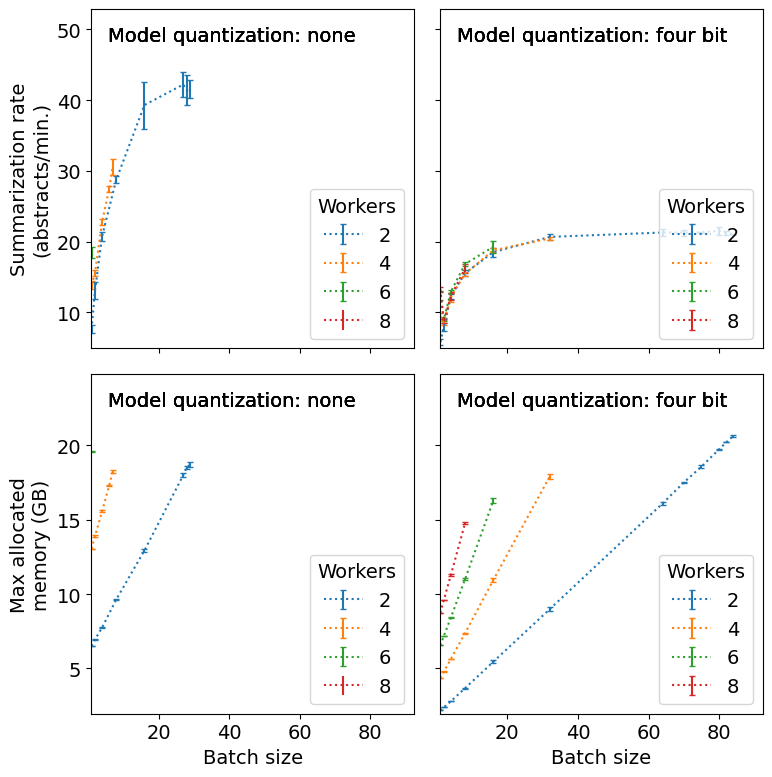

Mean max memory allocated (GB)
                           max memory allocated (GB)        \
quantization                                four bit  none   
workers per GPU batch size                                   
1               1                                2.2   6.5   
                2                                2.4   7.0   
                4                                2.8   7.7   
                8                                3.7   9.6   
                16                               5.4  12.9   
                27                               nan  18.0   
                28                               nan  18.5   
                29                               nan  18.7   
                32                               9.0   nan   
                64                              16.1   nan   
                70                              17.5   nan   
                75                              18.6   nan   
                80                     

In [10]:
data = plot_funcs.parallel_batched_summarization_plot(
    datafile='../benchmarks/parallel_batched_summarization/results.csv',
    unique_condition_columns=[
        'batch size',
        'quantization',
        'workers per GPU'
    ],
    oom_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
        'model memory footprint (bytes)',
        'max memory allocated (bytes)',
    ],
    str_columns=['quantization'], 
    int_columns=[
        'model memory footprint (bytes)',
        'max memory allocated (bytes)'
    ], 
    float_columns=[
        'summarization time (sec.)',
        'summarization rate (abstracts/sec.)',
    ],
    oom_replacement_val=np.nan    
)

**Conclusion**: Same as perviously, more quantized models can be run in parallel due to memory savings, but the speed up due to increased parallelism is not enough to compete with the un-quantized model. One worker per GPU with the largest batch size that will fit in memory (16) wins.

## 6. SQL Insert

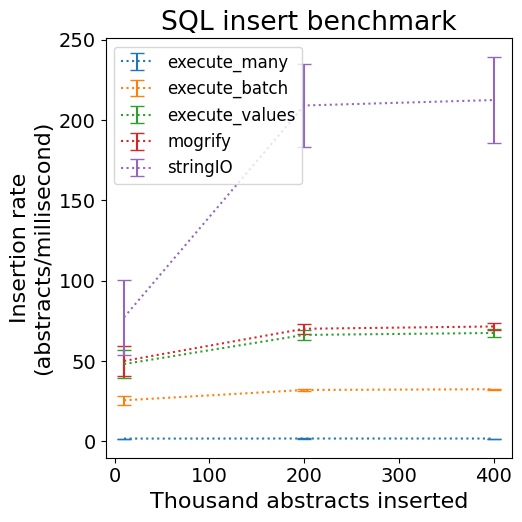

Mean insert rate (abstracts/millisecond)
insert strategy  execute_batch  execute_many  execute_values  mogrify  \
abstracts                                                               
10000                    25.60          1.76           48.16    50.10   
200000                   32.02          1.80           66.27    70.10   
400000                   32.47          1.80           67.48    71.53   

insert strategy  stringIO  
abstracts                  
10000               77.25  
200000             209.03  
400000             212.42  


In [11]:
data = plot_funcs.sql_insert_plot('../benchmarks/sql_insert/results.csv')

**Conclusion**: StringIO with 200,000 abstracts per call wins by a mile. SQL was definitely not the bottleneck here - but, why not speed it up?

## 7. Final result

In [12]:
total_secs = 3580000 * 16.5
total_mins = total_secs / 60
total_hrs = total_mins / 60
total_unoptimized_days = total_hrs / 24
print(f'Estimated total summarization time, before optimization: {round(total_unoptimized_days, 0)} days.')

total_mins = 3580000 * (1/100)
total_hrs = total_mins / 60
total_optimized_days = total_hrs / 24
print(f'Estimated total summarization time, after optimization: {round(total_optimized_days, 0)} days.')

print(f'\nTotal speed-up: {round(total_unoptimized_days / total_optimized_days, 0)} fold.')

Estimated total summarization time, before optimization: 684.0 days.
Estimated total summarization time, after optimization: 25.0 days.

Total speed-up: 28.0 fold.
